# Ensemble Models

In [ ]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


In [ ]:
# Load in training and test data
X_train = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/X_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/X_test.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/y_train.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/y_test.csv")

# Flatten targets to 1D arrays for scikit-learn
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [ ]:
def regression_metrics(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"=== {label} ===")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2 : {r2:.3f}")
    print()


# Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42,
)

gbr.fit(X_train, y_train)

# Predictions
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Evaluate
regression_metrics(y_train, y_train_pred, label="Gradient Boosting (Train)")
regression_metrics(y_test, y_test_pred, label="Gradient Boosting (Test)")


=== Gradient Boosting (Train) ===
MAE : 1.478
RMSE: 1.785
R^2 : 0.586

=== Gradient Boosting (Test) ===
MAE : 2.247
RMSE: 2.709
R^2 : -0.100



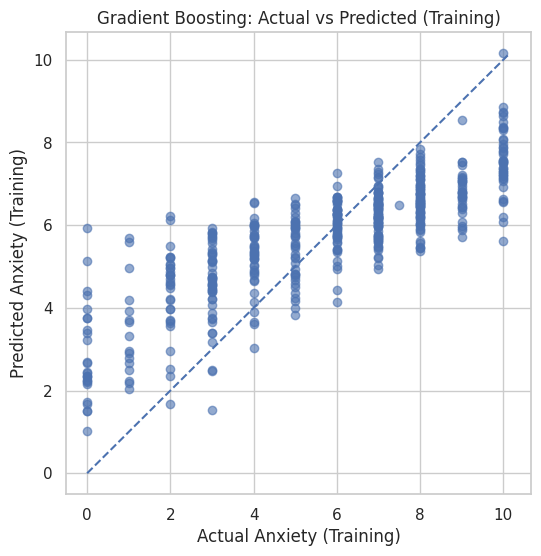

In [ ]:
# Actual vs Predicted for TRAINING data

plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)

line_min = min(y_train.min(), y_train_pred.min())
line_max = max(y_train.max(), y_train_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], linestyle="--")

plt.xlabel("Actual Anxiety (Training)")
plt.ylabel("Predicted Anxiety (Training)")
plt.title("Gradient Boosting: Actual vs Predicted (Training)")
plt.savefig("../OUTPUT/GradientBoosting_actualvspredicted_train.png", dpi=300, bbox_inches='tight')
plt.show()

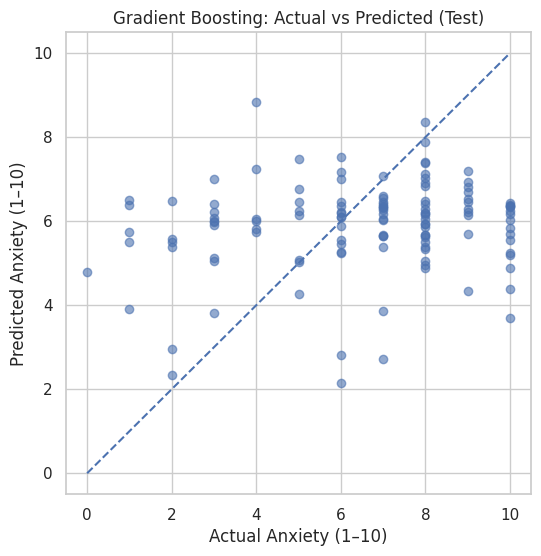

In [ ]:
# Actual vs Predicted for TESTING data

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
line_min = min(y_test.min(), y_test_pred.min())
line_max = max(y_test.max(), y_test_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], linestyle="--")

plt.xlabel("Actual Anxiety (1–10)")
plt.ylabel("Predicted Anxiety (1–10)")
plt.title("Gradient Boosting: Actual vs Predicted (Test)")
plt.savefig("../OUTPUT/GBR_actualvspredicted_test.png", dpi=300, bbox_inches='tight')
plt.show()



# Random Forest

In [ ]:
def regression_metrics(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"=== {label} ===")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2 : {r2:.3f}")
    print()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

regression_metrics(y_train, rf_train_pred, "Random Forest (Train)")
regression_metrics(y_test, rf_test_pred, "Random Forest (Test)")


=== Random Forest (Train) ===
MAE : 1.196
RMSE: 1.473
R^2 : 0.718

=== Random Forest (Test) ===
MAE : 2.131
RMSE: 2.520
R^2 : 0.048



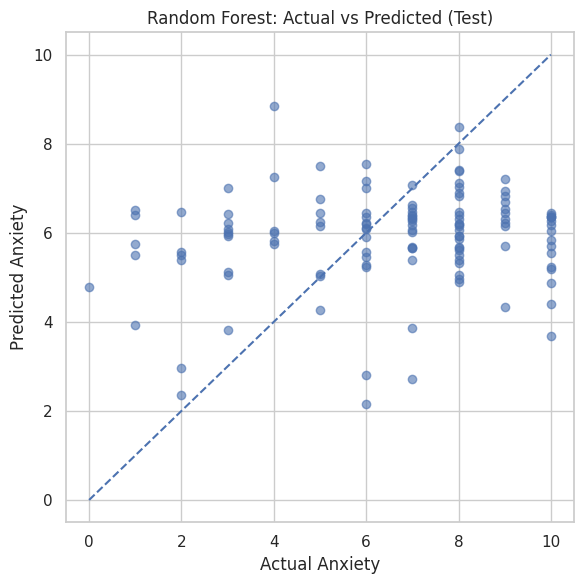

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)

line_min = min(y_test.min(), y_test_pred.min())
line_max = max(y_test.max(), y_test_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], linestyle="--")

plt.xlabel("Actual Anxiety")
plt.ylabel("Predicted Anxiety")
plt.title("Random Forest: Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()


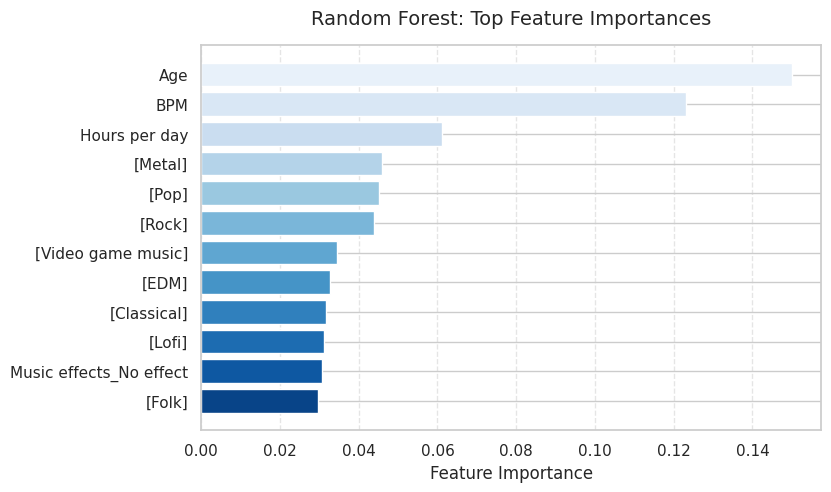

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

# Sort importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_k = 12  # show top 12 features
top_features = X_train.columns[indices][:top_k]
top_values = importances[indices][:top_k]

plt.figure(figsize=(8, 5))

# Use a nicer color palette
colors = sns.color_palette("Blues_r", top_k)

plt.barh(
    y=np.arange(top_k),
    width=top_values[::-1],
    color=colors)

plt.yticks(np.arange(top_k), [label.replace("Frequency ", "") for label in top_features[::-1]])

plt.xlabel("Feature Importance", fontsize=12)
plt.title("Random Forest: Top Feature Importances", fontsize=14, pad=15)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig("../OUTPUT/RF_featureimportance.png", dpi=300, bbox_inches='tight')
plt.show()


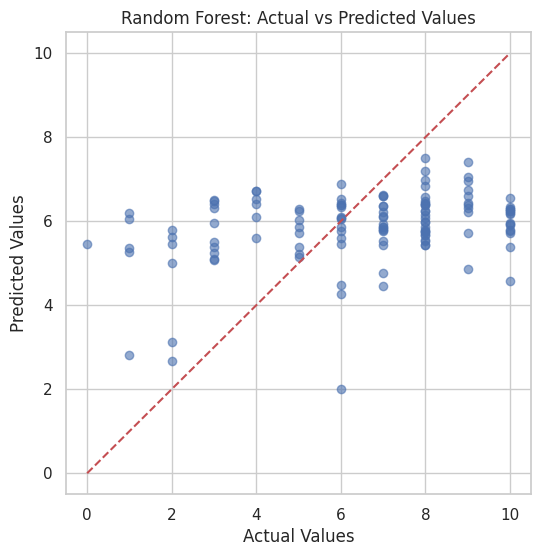

In [ ]:
y_test_pred = rf.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)

line_min = min(y_test.min(), y_test_pred.min())
line_max = max(y_test.max(), y_test_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], "r--")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted Values")
plt.savefig("../OUTPUT/RF_actualvspredicted_test.png", dpi=300, bbox_inches='tight')
plt.show()


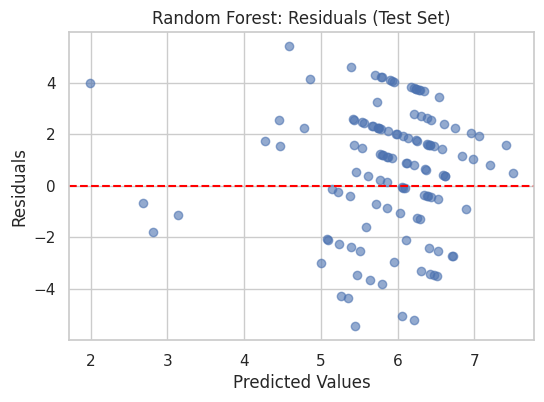

In [ ]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")   # red dashed at 0

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest: Residuals (Test Set)")
plt.savefig("../OUTPUT/RF_residuals_test.png", dpi=300, bbox_inches='tight')
plt.show()


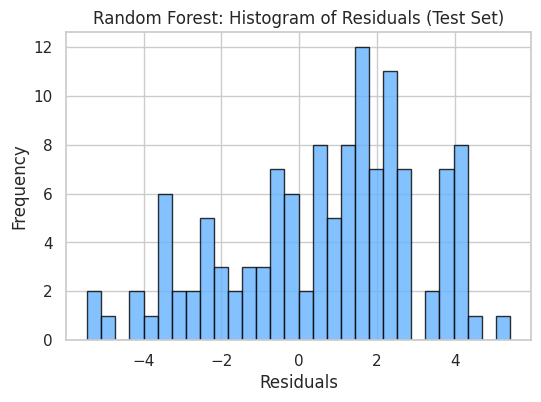

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color="#66b3ff", edgecolor="black", alpha=0.8)

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Random Forest: Histogram of Residuals (Test Set)")
plt.savefig("../OUTPUT/RF_residualhist_test.png", dpi=300, bbox_inches='tight')
plt.show()
